In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Load the dataset from the mounted drive
file_path = '/content/drive/MyDrive/realfishdataset.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to confirm successful loading
print(df.head())

    ph  temperature  turbidity   fish
0  6.0         27.0        4.0  katla
1  7.6         28.0        5.9   sing
2  7.8         27.0        5.5   sing
3  6.5         31.0        5.5  katla
4  8.2         27.0        8.5  prawn


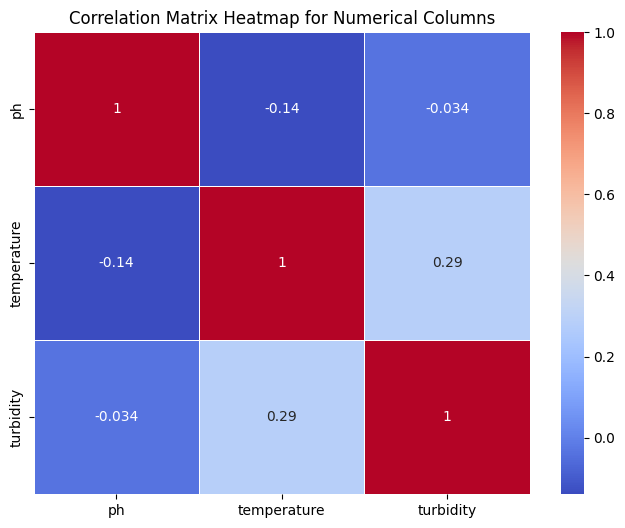

In [ ]:
correlation_matrix = df[['ph', 'temperature', 'turbidity']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap for Numerical Columns')
plt.show()

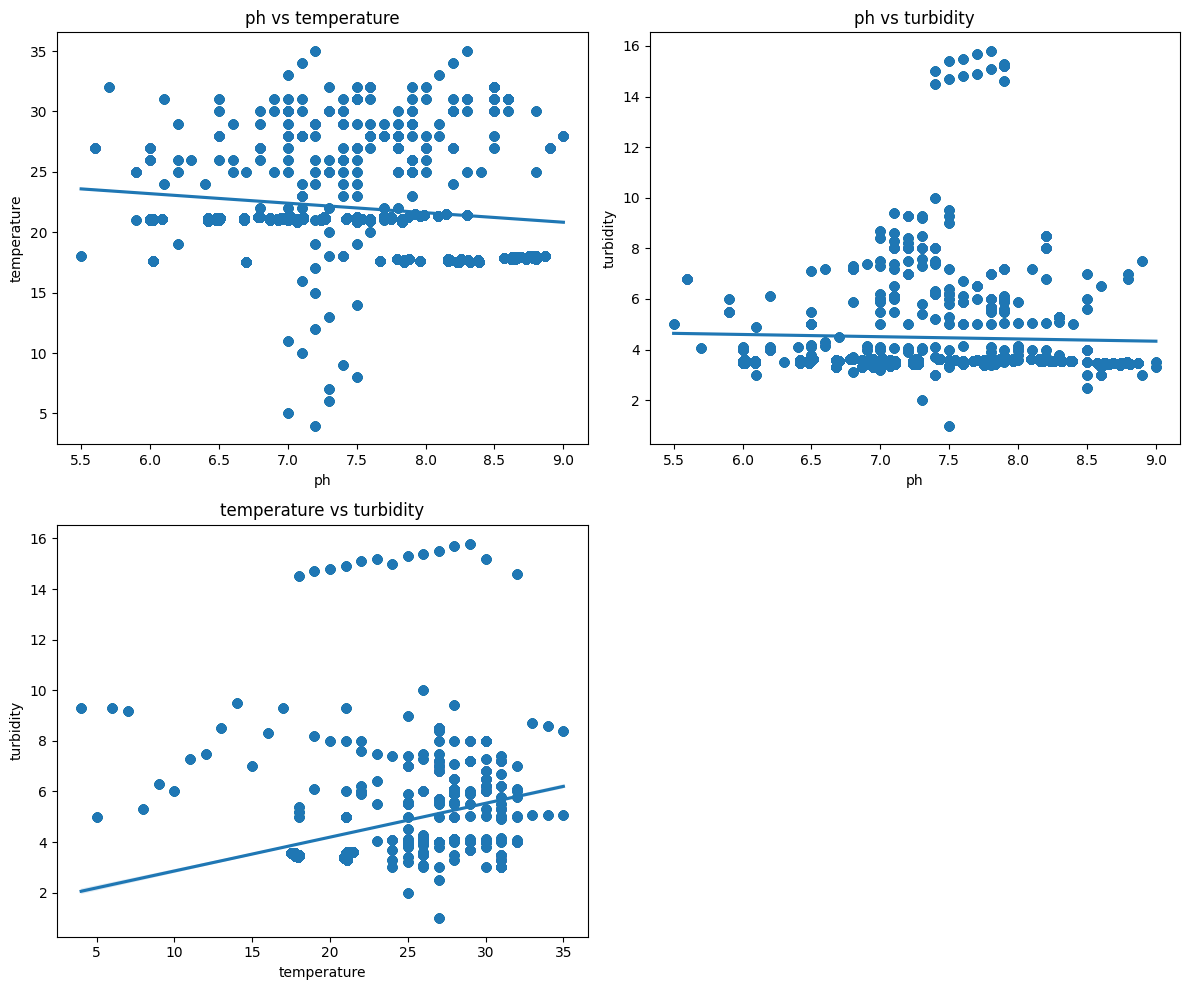

In [ ]:
plt.figure(figsize=(12, 10))

# Scatter plot for 'ph' and 'temperature'
plt.subplot(2, 2, 1)
sns.regplot(x='ph', y='temperature', data=df)
plt.title('ph vs temperature')

# Scatter plot for 'ph' and 'turbidity'
plt.subplot(2, 2, 2)
sns.regplot(x='ph', y='turbidity', data=df)
plt.title('ph vs turbidity')

# Scatter plot for 'temperature' and 'turbidity'
plt.subplot(2, 2, 3)
sns.regplot(x='temperature', y='turbidity', data=df)
plt.title('temperature vs turbidity')

plt.tight_layout()
plt.show()



<ipython-input-8-918eb3723770>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")


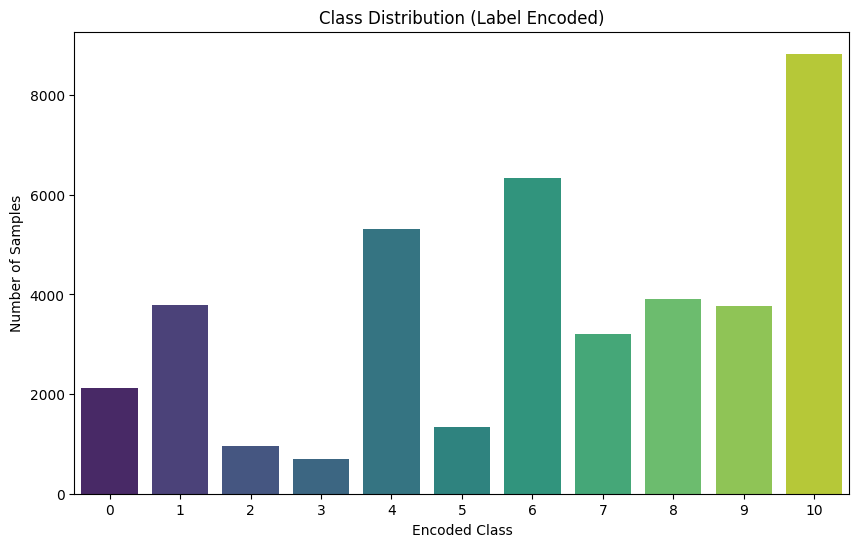

Label Encoding Mapping:
karpio: 0
katla: 1
koi: 2
magur: 3
pangas: 4
prawn: 5
rui: 6
shrimp: 7
silverCup: 8
sing: 9
tilapia: 10


,ph,temperature,turbidity,fish_encoded
0,6.00,27.00,4.00,1
1,7.60,28.00,5.90,9
2,7.80,27.00,5.50,9
3,6.50,31.00,5.50,1
4,8.20,27.00,8.50,5
...,...,...,...,...
40275,6.99,21.19,3.56,9
40276,6.87,21.00,3.56,9
40277,6.68,21.19,3.58,9
40278,6.95,21.12,3.58,9


In [ ]:


# Load the dataset (replace with the correct path if needed)
# df = pd.read_csv("your_dataset.csv")

# Step 1: Label encoding the 'fish' column
label_encoder = LabelEncoder()
df['fish_encoded'] = label_encoder.fit_transform(df['fish'])

# Step 2: Visualize the class distribution after label encoding
class_distribution = df['fish_encoded'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")
plt.title('Class Distribution (Label Encoded)')
plt.xlabel('Encoded Class')
plt.ylabel('Number of Samples')
plt.show()

# Print the mapping of labels to encoded values
print("Label Encoding Mapping:")
for label, encoded in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {encoded}")

data_new = df[['ph','temperature', 'turbidity', 'fish_encoded']]
data_new

In [ ]:
!pip install catboost


In [ ]:

data_new

,ph,temperature,turbidity,fish_encoded
0,6.00,27.00,4.00,1
1,7.60,28.00,5.90,9
2,7.80,27.00,5.50,9
3,6.50,31.00,5.50,1
4,8.20,27.00,8.50,5
...,...,...,...,...
40275,6.99,21.19,3.56,9
40276,6.87,21.00,3.56,9
40277,6.68,21.19,3.58,9
40278,6.95,21.12,3.58,9


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assume `data_new` is your DataFrame
# Features and target
X = data_new[['ph', 'temperature', 'turbidity']]  # Environmental factors
y = data_new['fish_encoded']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Artificial Neural Networks': MLPClassifier(max_iter=300, random_state=42),
    'k-Nearest Neighbour': KNeighborsClassifier(n_neighbors=4),
    'Random Forest': RandomForestClassifier(random_state=100),
    'Decision Tree': DecisionTreeClassifier(random_state=100, max_depth=5),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42)
}

# Dictionary to store the results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model on the original training data
    model.fit(X_train_scaled, y_train)

    # Predictions on train and test sets
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')

    # Store the results
    results[model_name] = {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'train_f1_score': train_f1,
        'test_f1_score': test_f1,
        'train_precision': train_precision,
        'test_precision': test_precision,
        'train_recall': train_recall,
        'test_recall': test_recall
    }

# Convert results into a DataFrame for easy comparison
results_df = pd.DataFrame(results).T

# Display the results
print("\nModel Performance without SMOTE:")
print(results_df)


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Training Artificial Neural Networks...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Training k-Nearest Neighbour...
Training Random Forest...
Training Decision Tree...
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:41:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001928 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 253
[LightGBM] [Info] Number of data points in the train set: 32224, number of used features: 3
[LightGBM] [Info] Start training from score -2.947983
[LightGBM] [Info] Start training from score -2.364479
[LightGBM] [Info] Start training from score -3.732778
[LightGBM] [Info] Start training from score -4.047187
[LightGBM] [Info] Start training from score -2.025557
[LightGBM] [Info] Start training from score -3.397604
[LightGBM] [Info] Start training from score -1.849568
[LightGBM] [Info] Start training from score -2.531533
[LightGBM] [Info] Start training from score -2.333277
[LightGBM] [Info] Start training from score -2.367124
[LightGBM] [Info] Start training from score -1.517700
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Training CatBoost...

Model Performance without SMOTE:
                            train_accuracy  test_accuracy  train_f1_score  \
Artificial Neural Networks        0.963816       0.962016        0.964309   
k-Nearest Neighbour               0.998510       0.998014        0.998509   
Random Forest                     0.998510       0.998014        0.998509   
Decision Tree                     0.715523       0.714126        0.746276   
XGBoost                           0.998510       0.998014        0.998509   
LightGBM                          0.998510       0.998014        0.998509   
CatBoost                          0.998510       0.998014        0.998509   

                            test_f1_score  train_precision  test_precision  \
Artificial Neural Networks       0.962602         0.968403        0.967009   
k-Nearest Neighbour              0.998011         0.998527        0.998043   
Random Forest                    0.998011         0.998527        0.998043   
Decision Tree   

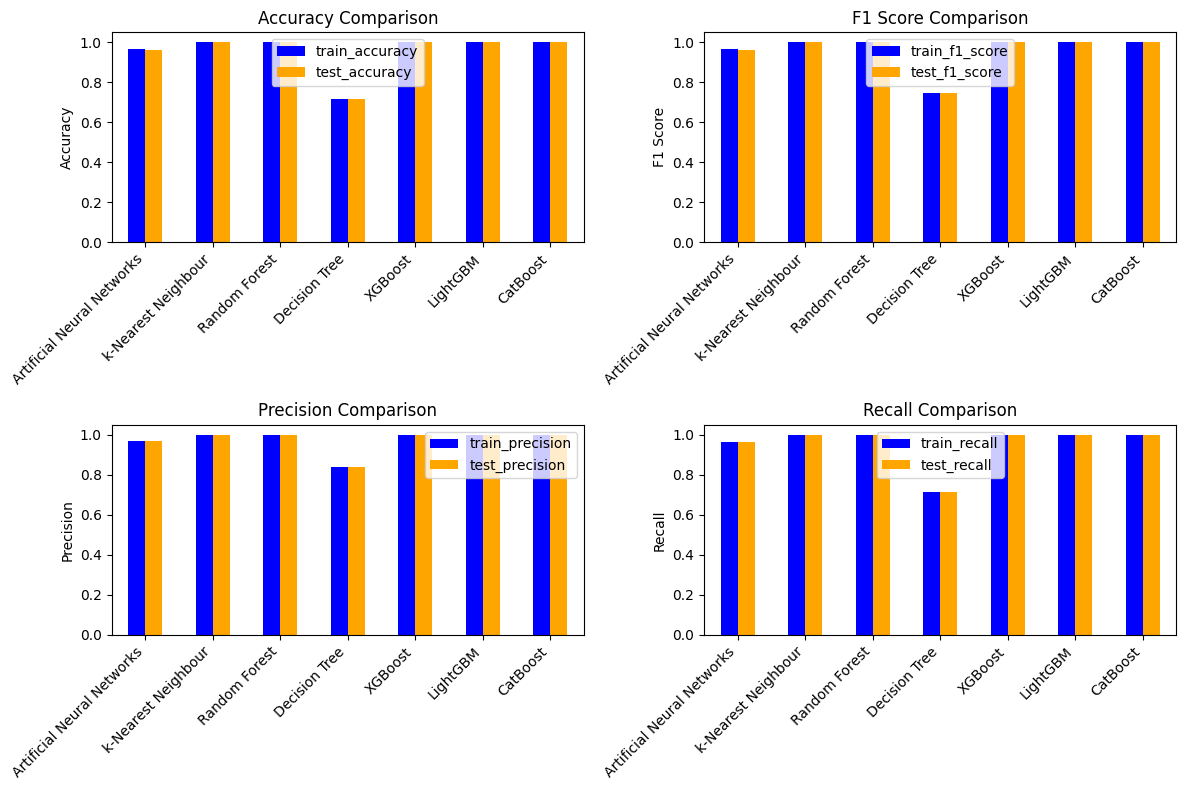

In [ ]:
# Set the size of the plots
plt.figure(figsize=(12, 8))

# Plot accuracy
plt.subplot(2, 2, 1)
results_df[['train_accuracy', 'test_accuracy']].plot(kind='bar', ax=plt.gca(), color=['blue', 'orange'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')

# Plot F1 score
plt.subplot(2, 2, 2)
results_df[['train_f1_score', 'test_f1_score']].plot(kind='bar', ax=plt.gca(), color=['blue', 'orange'])
plt.title('F1 Score Comparison')
plt.ylabel('F1 Score')
plt.xticks(rotation=45, ha='right')

# Plot precision
plt.subplot(2, 2, 3)
results_df[['train_precision', 'test_precision']].plot(kind='bar', ax=plt.gca(), color=['blue', 'orange'])
plt.title('Precision Comparison')
plt.ylabel('Precision')
plt.xticks(rotation=45, ha='right')

# Plot recall
plt.subplot(2, 2, 4)
results_df[['train_recall', 'test_recall']].plot(kind='bar', ax=plt.gca(), color=['blue', 'orange'])
plt.title('Recall Comparison')
plt.ylabel('Recall')
plt.xticks(rotation=45, ha='right')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


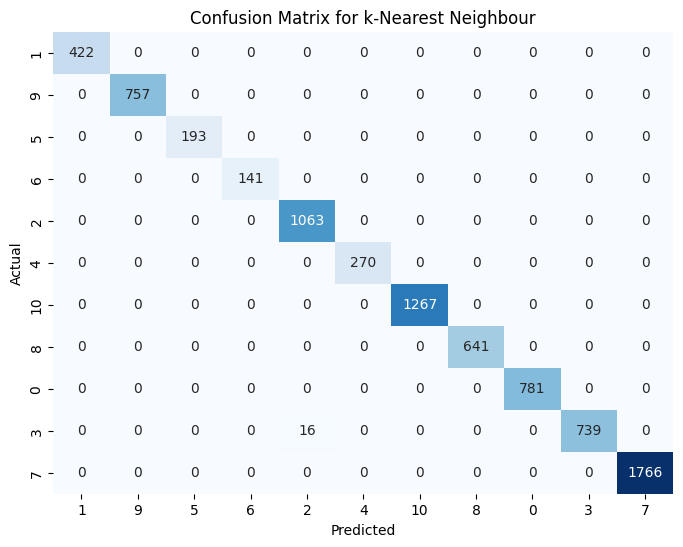

In [ ]:
# Find the best model based on test accuracy
best_model_name = results_df['test_accuracy'].idxmax()
best_model = models[best_model_name]

# Generate confusion matrix
from sklearn.metrics import confusion_matrix

# Predictions on the test set
y_test_pred_best = best_model.predict(X_test_scaled)

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_best)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique(), cbar=False)
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


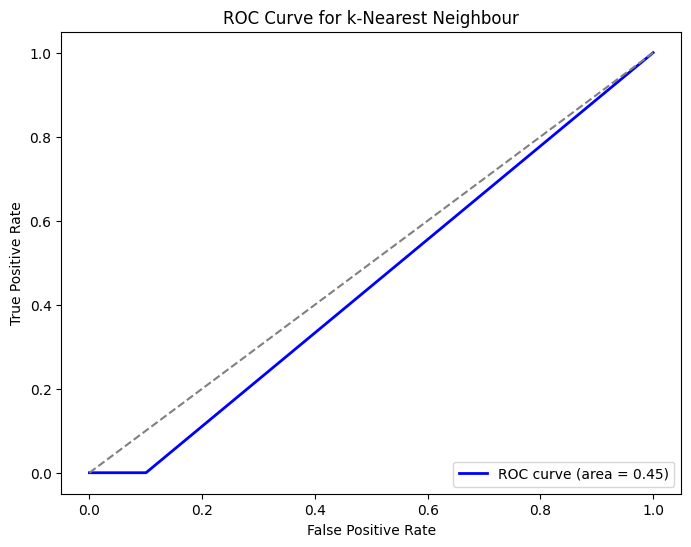

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the target labels for multi-class ROC curve
y_train_bin = label_binarize(y_train, classes=y.unique())
y_test_bin = label_binarize(y_test, classes=y.unique())

# Predict probabilities
y_test_prob_best = best_model.predict_proba(X_test_scaled)

# Calculate ROC curve and AUC for each class
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_test_prob_best.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title(f'ROC Curve for {best_model_name}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


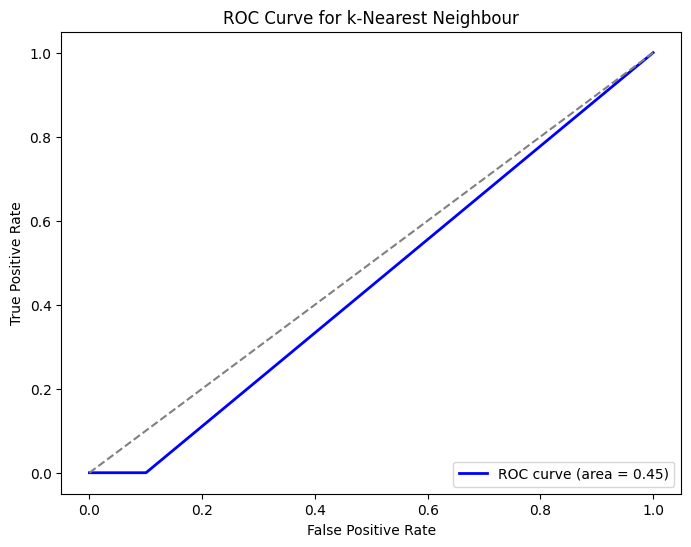

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the target labels for multi-class ROC curve
y_train_bin = label_binarize(y_train, classes=y.unique())
y_test_bin = label_binarize(y_test, classes=y.unique())

# Predict probabilities
y_test_prob_best = best_model.predict_proba(X_test_scaled)

# Calculate ROC curve and AUC for each class
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_test_prob_best.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title(f'ROC Curve for {best_model_name}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [ ]:
!pip install shap


In [ ]:
import shap
random_forest = models['Random Forest']  # Retrieve the trained Random Forest model
print("Performing SHAP analysis for Random Forest...")
explainer = shap.TreeExplainer(random_forest)


print(data_new.index)  # Check all available indices in data_new
print(X_test.index)    # Check all available indices in X_test


print(X_test)

Performing SHAP analysis for Random Forest...
RangeIndex(start=0, stop=40280, step=1)
Index([ 4528, 22858, 36786, 25279, 18047, 30184, 25507, 21238,  8244, 26616,
       ...
       30421, 29460, 20102, 22480,  4407, 36090, 10816, 36198, 23333, 37542],
      dtype='int64', length=8056)
         ph  temperature  turbidity
4528   7.50        14.00       9.50
22858  8.39        17.50       3.56
36786  6.42        21.19       3.57
25279  7.40        31.00       3.00
18047  8.66        17.94       3.44
...     ...          ...        ...
36090  8.32        17.56       3.56
10816  7.20        15.00       7.00
36198  8.73        17.81       3.45
23333  7.10        28.00       6.10
37542  7.96        17.62       3.56

[8056 rows x 3 columns]


In [ ]:
X_test = X_test.reset_index(drop=True)
print(X_test)

        ph  temperature  turbidity
0     7.50        14.00       9.50
1     8.39        17.50       3.56
2     6.42        21.19       3.57
3     7.40        31.00       3.00
4     8.66        17.94       3.44
...    ...          ...        ...
8051  8.32        17.56       3.56
8052  7.20        15.00       7.00
8053  8.73        17.81       3.45
8054  7.10        28.00       6.10
8055  7.96        17.62       3.56

[8056 rows x 3 columns]


In [ ]:
import shap
random_forest = models['Random Forest']
print("Performing SHAP analysis for Random Forest...")
explainer = shap.TreeExplainer(random_forest)
data_new.loc[[421]]

Performing SHAP analysis for Random Forest...


,ph,temperature,turbidity,fish_encoded
421,8.65,17.75,3.44,10


In [ ]:
choosen_instance = X_test.loc[[421]]
print(choosen_instance)

      ph  temperature  turbidity
421  7.4         24.0       15.0


In [ ]:
choosen_instance = X_test.loc[[421]]
shap_values = explainer.shap_values(choosen_instance)
print("Type of shap_values:", type(shap_values))
print("Length of shap_values:", len(shap_values) if isinstance(shap_values, list) else "Not a list")
print("Shape of each shap_values array:")
if isinstance(shap_values, list):
    for i, sv in enumerate(shap_values):
        print(f"Class {i}: {sv.shape}")
else:
    print(shap_values.shape)



Type of shap_values: <class 'numpy.ndarray'>
Length of shap_values: Not a list
Shape of each shap_values array:
(1, 3, 11)


In [ ]:
class_of_interest = 0  # Change this to the desired class

# Extract SHAP values for the specific class
shap_values_for_class = shap_values[0, :, class_of_interest]  # Instance 0, all features, specific class

# Initialize SHAP visualization
shap.initjs()

# Force Plot
shap.force_plot(
    explainer.expected_value[class_of_interest],  # Expected value for the chosen class
    shap_values_for_class,  # SHAP values for this instance and class
    choosen_instance.iloc[0])





In [ ]:
import shap
import xgboost as xgb

# Assuming 'models' is a dictionary containing your trained models, including 'XGBoost'
xgboost_model = models['XGBoost']  # Retrieve the trained XGBoost model
print("Performing SHAP analysis for XGBoost...")

# XGBoost models require a different TreeExplainer, we use shap.Explainer for XGBoost
explainer = shap.Explainer(xgboost_model)

# Check available indices in data_new and X_test
print(data_new.index)
print(X_test.index)

# Reset index for X_test, if necessary
X_test = X_test.reset_index(drop=True)
print(X_test)

# Choose an instance to explain
chosen_instance = X_test.loc[[421]]
print(chosen_instance)

# Get SHAP values for the chosen instance
shap_values = explainer(chosen_instance)
print("Type of shap_values:", type(shap_values))
print("Length of shap_values:", len(shap_values.values) if hasattr(shap_values, 'values') else "Not available")
print("Shape of shap_values array:")
print(shap_values.values.shape)

# Select class of interest for classification tasks (if multi-class)
class_of_interest = 0  # Change this to the desired class (0-based index)

# Extract SHAP values for the specific class
shap_values_for_class = shap_values.values[0, :, class_of_interest]  # Instance 0, all features, specific class

# Initialize SHAP visualization
shap.initjs()

# Force Plot for a specific class using the corrected API
shap.plots.force(
    explainer.expected_value[class_of_interest],  # Expected value for the chosen class
    shap_values_for_class,
    chosen_instance.iloc[0])  # Display the chosen instance's features


Performing SHAP analysis for XGBoost...
RangeIndex(start=0, stop=40280, step=1)
RangeIndex(start=0, stop=8056, step=1)
        ph  temperature  turbidity
0     7.50        14.00       9.50
1     8.39        17.50       3.56
2     6.42        21.19       3.57
3     7.40        31.00       3.00
4     8.66        17.94       3.44
...    ...          ...        ...
8051  8.32        17.56       3.56
8052  7.20        15.00       7.00
8053  8.73        17.81       3.45
8054  7.10        28.00       6.10
8055  7.96        17.62       3.56

[8056 rows x 3 columns]
      ph  temperature  turbidity
421  7.4         24.0       15.0
Type of shap_values: <class 'shap._explanation.Explanation'>
Length of shap_values: 1
Shape of shap_values array:
(1, 3, 11)


In [ ]:
import shap
import lightgbm as lgb

# Assuming 'models' is a dictionary containing your trained models, including 'LightGBM'
lightgbm_model = models['LightGBM']  # Retrieve the trained LightGBM model
print("Performing SHAP analysis for LightGBM...")

# LightGBM models require the same shap.Explainer as XGBoost
explainer = shap.Explainer(lightgbm_model)

# Check available indices in data_new and X_test
print(data_new.index)
print(X_test.index)

# Reset index for X_test, if necessary
X_test = X_test.reset_index(drop=True)
print(X_test)

# Choose an instance to explain
chosen_instance = X_test.loc[[421]]  # Change to the desired index number
print(chosen_instance)

# Get SHAP values for the chosen instance
shap_values = explainer(chosen_instance)
print("Type of shap_values:", type(shap_values))
print("Length of shap_values:", len(shap_values.values) if hasattr(shap_values, 'values') else "Not available")
print("Shape of shap_values array:")
print(shap_values.values.shape)

# Select class of interest for classification tasks (if multi-class)
class_of_interest = 0  # Change this to the desired class (0-based index)

# Extract SHAP values for the specific class
shap_values_for_class = shap_values.values[0, :, class_of_interest]  # Instance 0, all features, specific class

# Initialize SHAP visualization
shap.initjs()

# Force Plot for a specific class using the corrected API
shap.plots.force(
    explainer.expected_value[class_of_interest],  # Expected value for the chosen class
    shap_values_for_class,  # SHAP values for this instance and class
    chosen_instance.iloc[0])  # Display the chosen instance's features


Performing SHAP analysis for LightGBM...
RangeIndex(start=0, stop=40280, step=1)
RangeIndex(start=0, stop=8056, step=1)
        ph  temperature  turbidity
0     7.50        14.00       9.50
1     8.39        17.50       3.56
2     6.42        21.19       3.57
3     7.40        31.00       3.00
4     8.66        17.94       3.44
...    ...          ...        ...
8051  8.32        17.56       3.56
8052  7.20        15.00       7.00
8053  8.73        17.81       3.45
8054  7.10        28.00       6.10
8055  7.96        17.62       3.56

[8056 rows x 3 columns]
      ph  temperature  turbidity
421  7.4         24.0       15.0
Type of shap_values: <class 'shap._explanation.Explanation'>
Length of shap_values: 1
Shape of shap_values array:
(1, 3, 11)


In [ ]:
import shap
import catboost as cb

# Assuming 'models' is a dictionary containing your trained models, including 'CatBoost'
catboost_model = models['CatBoost']  # Retrieve the trained CatBoost model
print("Performing SHAP analysis for CatBoost...")

# CatBoost models require the same shap.Explainer as XGBoost and LightGBM
explainer = shap.Explainer(catboost_model)

# Check available indices in data_new and X_test
print(data_new.index)
print(X_test.index)

# Reset index for X_test, if necessary
X_test = X_test.reset_index(drop=True)
print(X_test)

# Choose an instance to explain
chosen_instance = X_test.loc[[421]]  # Change to the desired index number
print(chosen_instance)

# Get SHAP values for the chosen instance
shap_values = explainer(chosen_instance)
print("Type of shap_values:", type(shap_values))
print("Length of shap_values:", len(shap_values.values) if hasattr(shap_values, 'values') else "Not available")
print("Shape of shap_values array:")
print(shap_values.values.shape)

# Select class of interest for classification tasks (if multi-class)
class_of_interest = 0  # Change this to the desired class (0-based index)

# Extract SHAP values for the specific class
shap_values_for_class = shap_values.values[0, :, class_of_interest]  # Instance 0, all features, specific class

# Initialize SHAP visualization
shap.initjs()

# Force Plot for a specific class using the corrected API
shap.plots.force(
    explainer.expected_value[class_of_interest],  # Expected value for the chosen class
    shap_values_for_class,  # SHAP values for this instance and class
    chosen_instance.iloc[0])  # Display the chosen instance's features


Performing SHAP analysis for CatBoost...
RangeIndex(start=0, stop=40280, step=1)
RangeIndex(start=0, stop=8056, step=1)
        ph  temperature  turbidity
0     7.50        14.00       9.50
1     8.39        17.50       3.56
2     6.42        21.19       3.57
3     7.40        31.00       3.00
4     8.66        17.94       3.44
...    ...          ...        ...
8051  8.32        17.56       3.56
8052  7.20        15.00       7.00
8053  8.73        17.81       3.45
8054  7.10        28.00       6.10
8055  7.96        17.62       3.56

[8056 rows x 3 columns]
      ph  temperature  turbidity
421  7.4         24.0       15.0
Type of shap_values: <class 'shap._explanation.Explanation'>
Length of shap_values: 1
Shape of shap_values array:
(1, 3, 11)


In [ ]:
import shap

# Define the models of interest
models_of_interest = ['k-Nearest Neighbour', 'Artificial Neural Networks']
for model_name in models_of_interest:
    model = models[model_name]
    print(f"Performing SHAP analysis for {model_name}...")

    # For KNN, use KernelExplainer, for ANN (MLP), use KernelExplainer as well
    if model_name == 'k-Nearest Neighbour':
        explainer = shap.KernelExplainer(model.predict_proba, shap.kmeans(X_train_scaled, 10))  # Use kmeans to summarize the data
    elif model_name == 'Artificial Neural Networks':
        explainer = shap.KernelExplainer(model.predict_proba, shap.kmeans(X_train_scaled, 10))  # For MLPClassifier, we use KernelExplainer

    # Choose the instance to analyze (you can modify this index as needed)
    chosen_instance = X_test.loc[[421]]  # Replace 421 with your desired index
    print(f"Chosen instance for {model_name}:")
    print(chosen_instance)

    # Compute SHAP values for the chosen instance
    shap_values = explainer.shap_values(chosen_instance)
    print("Type of shap_values:", type(shap_values))
    print("Length of shap_values:", len(shap_values) if isinstance(shap_values, list) else "Not a list")
    print("Shape of each shap_values array:")



Performing SHAP analysis for k-Nearest Neighbour...
Chosen instance for k-Nearest Neighbour:
      ph  temperature  turbidity
421  7.4         24.0       15.0


  0%|          | 0/1 [00:00<?, ?it/s]

Type of shap_values: <class 'numpy.ndarray'>
Length of shap_values: Not a list
Shape of each shap_values array:
Performing SHAP analysis for Artificial Neural Networks...
Chosen instance for Artificial Neural Networks:
      ph  temperature  turbidity
421  7.4         24.0       15.0


  0%|          | 0/1 [00:00<?, ?it/s]

Type of shap_values: <class 'numpy.ndarray'>
Length of shap_values: Not a list
Shape of each shap_values array:


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Load your dataset
file_path = '/content/drive/MyDrive/realfishdataset.csv'
df = pd.read_csv(file_path)

# Features (environmental factors)
X = df[['ph', 'temperature', 'turbidity']]

# Target: The 'fish' column (categorical, will be label encoded)
y = df['fish']

# Apply label encoding to the target variable 'fish'
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Apply standard scaling to the feature set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to balance the classes (if there is class imbalance)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train SVM with RBF kernel
svm_model = SVC(kernel='rbf', gamma='scale', random_state=42)  # RBF kernel
svm_model.fit(X_resampled, y_resampled)

# Predictions on the training and test sets
y_train_pred_svm = svm_model.predict(X_resampled)
y_test_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate SVM on the training set
train_accuracy = accuracy_score(y_resampled, y_train_pred_svm)
train_f1 = f1_score(y_resampled, y_train_pred_svm, average='weighted')
train_precision = precision_score(y_resampled, y_train_pred_svm, average='weighted')
train_recall = recall_score(y_resampled, y_train_pred_svm, average='weighted')

# Evaluate SVM on the test set
test_accuracy = accuracy_score(y_test, y_test_pred_svm)
test_f1 = f1_score(y_test, y_test_pred_svm, average='weighted')
test_precision = precision_score(y_test, y_test_pred_svm, average='weighted')
test_recall = recall_score(y_test, y_test_pred_svm, average='weighted')






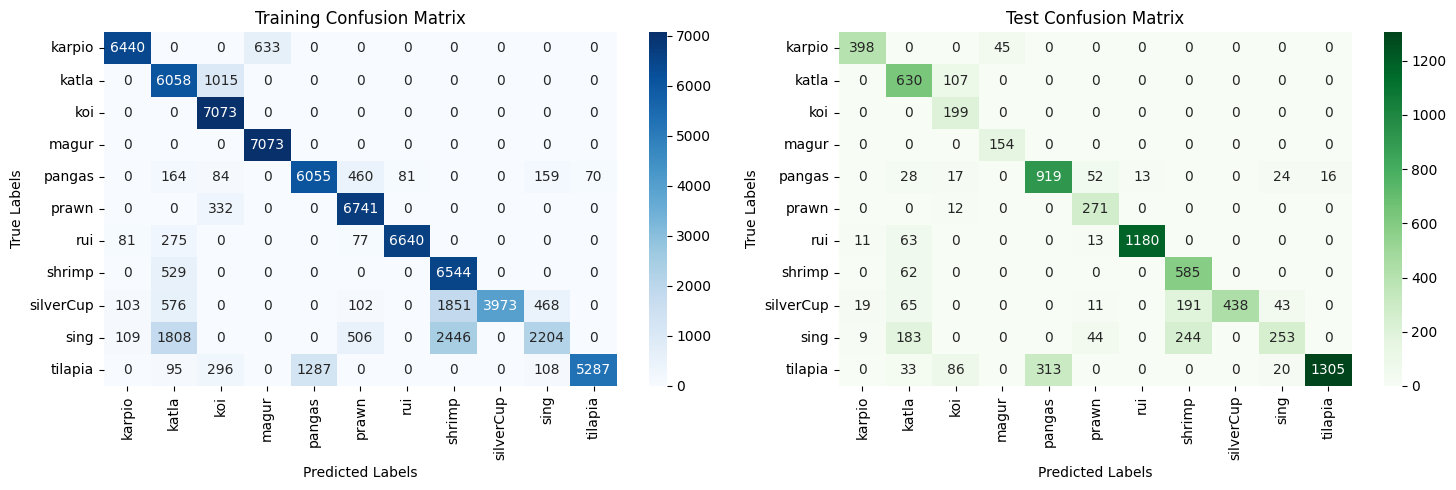

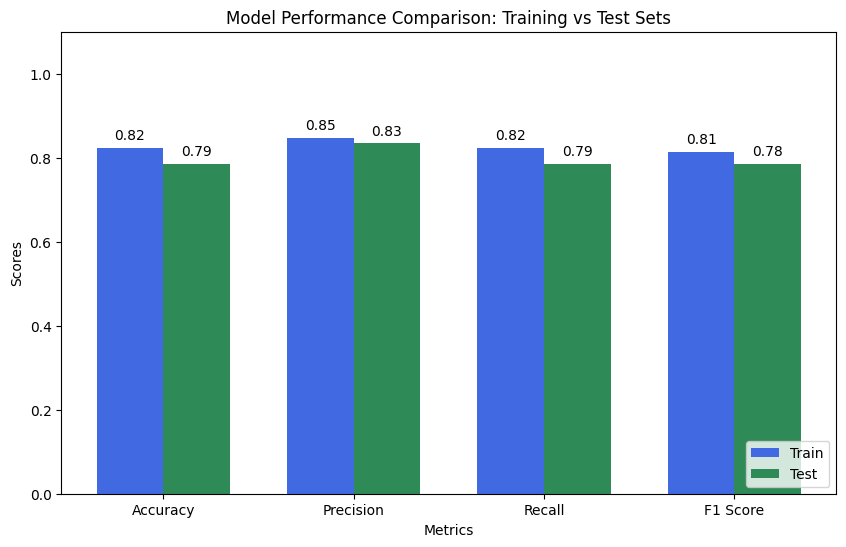

In [ ]:
import numpy as np

# Confusion Matrices
plt.figure(figsize=(15, 5))

# Training Confusion Matrix
plt.subplot(1, 2, 1)
cm_train = confusion_matrix(y_resampled, y_train_pred_svm)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Test Confusion Matrix
plt.subplot(1, 2, 2)
cm_test = confusion_matrix(y_test, y_test_pred_svm)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

# Metrics Comparison Visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
train_scores = [train_accuracy, train_precision, train_recall, train_f1]
test_scores = [test_accuracy, test_precision, test_recall, test_f1]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, train_scores, width, label='Train', color='royalblue')
plt.bar(x + width/2, test_scores, width, label='Test', color='seagreen')

plt.title('Model Performance Comparison: Training vs Test Sets')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.xticks(x, metrics)
plt.ylim(0, 1.1)
plt.legend(loc='lower right')

# Add value labels
for i, (train, test) in enumerate(zip(train_scores, test_scores)):
    plt.text(i - width/2, train + 0.02, f'{train:.2f}', ha='center')
    plt.text(i + width/2, test + 0.02, f'{test:.2f}', ha='center')

plt.show()